In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint
from scipy.io import loadmat

import pysindy as ps

In [238]:
def linearSHM(x, t):
    return [
        -0.2 * x[0] + 3 * x[1],
        -3 * x[0] - 0.2 * x[1]
    ]


dt = 0.01
computations = np.arange(0, 25, dt)
initial_con = [2, 0]
x_data = odeint(linearSHM, initial_con, computations)
print(x_data)

[[ 2.          0.        ]
 [ 1.99510587 -0.05987112]
 [ 1.98843143 -0.11944924]
 ...
 [ 0.01197316  0.00635904]
 [ 0.01213423  0.00598506]
 [ 0.0122837   0.00560717]]


In [4]:
poly_order = 1
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_data, t=dt)
model.print()

x0' = -0.200 x0 + 3.000 x1
x1' = -3.000 x0 + -0.200 x1


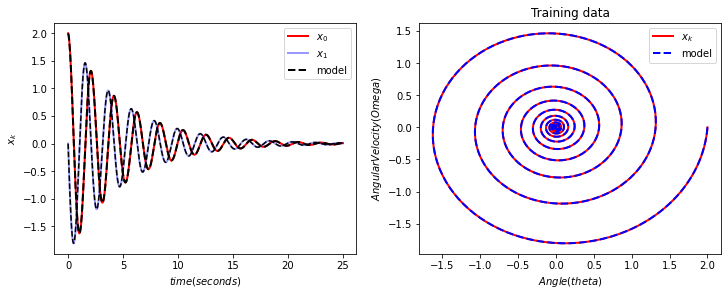

In [5]:
# Simulate and plot the results

x_sim = model.simulate(initial_con, computations)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(10, 4))
axs[0].plot(computations, x_data[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(computations, x_data[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(computations, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(computations, x_sim[:, 1], "k--")
axs[0].legend(loc="best")
axs[0].set(xlabel="$time (seconds)$", ylabel="$x_k$")


axs[1].plot(x_data[:, 0], x_data[:, 1], 'r-', label="$x_k$", color='r', **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], 'b--', label="model", color='b', **plot_kws)
axs[1].set(title='Training data', xlabel='$Angle(theta)$', ylabel='$ Angular Velocity (Omega) $')
axs[1].legend(loc="best")
fig.tight_layout
fig.show()

In [3]:
#noise + "c * np.random.standard_normal(size=1)" or "np.sqrt(dt)*(c)*(np.random.randn())"
g=9        #gravity aprrox
l=3         #pendulum length
lam = 0.2   #decay 
c = 0.1    #noise
T = 25      #total Time duration in steps
x0 = 2     #initial condition of x at time 0
y0= 0      #initial condition of y at time 0
dt=0.01    #timestep

# initiatialize variables
t = np.arange(0, T, dt)
x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0  #theta
y[0] = y0  #theta_dot

# Step through in time
for k in range(len(t)-1):
    x[k+1] = x[k]+dt*(-lam*x[k] + 3*y[k]) + np.sqrt(dt)*(c)*(np.random.randn())
    y[k+1] = y[k]+dt*(-lam*y[k] + (-g/l)*x[k])
    #print(x[k],y[k])
    
    
    
#fit to array    
x_data_1= np.vstack((x, y)).T

In [4]:
poly_order = 1
threshold = 0.05
fd_drop_endpoints = ps.FiniteDifference(drop_endpoints=True)

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
    differentiation_method=fd_drop_endpoints,
)
model.fit(x_data_1, t=dt)
model.print()

x0' = -0.118 x0 + 2.962 x1
x1' = -3.004 x0 + -0.156 x1


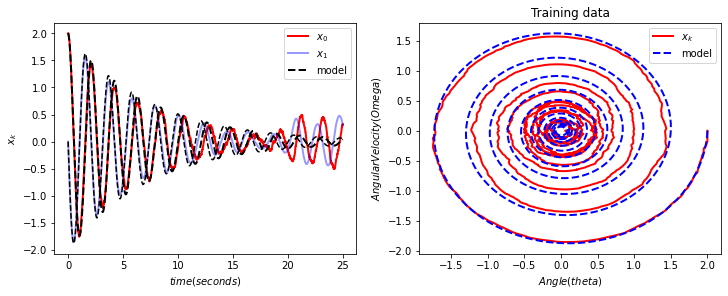

In [7]:
initial_con_1 = [2,0]
x_sim = model.simulate(initial_con_1, t)

plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(10, 4))
axs[0].plot(t, x_data_1[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t, x_data_1[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t, x_sim[:, 1], "k--")
axs[0].legend(loc="best")
axs[0].set(xlabel="$time (seconds)$", ylabel="$x_k$")

axs[1].plot(x_data_1[:, 0], x_data_1[:, 1], 'r-', label="$x_k$", color='r', **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], 'b--', label="model", color='b', **plot_kws)
axs[1].set(title='Training data', xlabel='$Angle(theta)$', ylabel='$ Angular Velocity (Omega) $')
axs[1].legend(loc="best")
fig.tight_layout
fig.show()